In [1]:
import findspark
findspark.init()

from pyspark import SparkContext, SparkConf, SQLContext

from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import os

CLICKHOUSE_IP = "34.32.60.106"
CLICKHOUSE_PORT = 9000
CLICKHOUSE_USER = "default"
CLICKHOUSE_USER_PASSWORD = "1278"

#https://repo1.maven.org/maven2/com/github/housepower/clickhouse-native-jdbc/2.7.1/clickhouse-native-jdbc-2.7.1.jar
packages = [
    "com.github.housepower:clickhouse-spark-runtime-3.4_2.12:0.7.3",
    "com.clickhouse:clickhouse-jdbc:0.6.0-patch4",
    "com.clickhouse:clickhouse-http-client:0.6.0-patch4",
    "org.apache.httpcomponents.client5:httpclient5:5.3.1",
    "com.github.housepower:clickhouse-native-jdbc:2.7.1"
]
ram = 30
cpu = 22*3
# Define the application name and setup session
appName = "Connect To ClickHouse via PySpark"
spark = (SparkSession.builder
         .appName(appName)
         .config("spark.jars.packages", ",".join(packages))
         .config("spark.sql.catalog.clickhouse", "xenon.clickhouse.ClickHouseCatalog")
         .config("spark.sql.catalog.clickhouse.host", CLICKHOUSE_IP)
         .config("spark.sql.catalog.clickhouse.protocol", "http")
         .config("spark.sql.catalog.clickhouse.http_port", "8123")
         .config("spark.sql.catalog.clickhouse.user", CLICKHOUSE_USER)
         .config("spark.sql.catalog.clickhouse.password", CLICKHOUSE_USER_PASSWORD)
         .config("spark.sql.catalog.clickhouse.database", "default")
         #.config("spark.spark.clickhouse.write.compression.codec", "lz4")
         #.config("spark.clickhouse.read.compression.codec", "lz4")
         #.config("spark.clickhouse.write.format", "arrow")
         #    .config("spark.clickhouse.write.distributed.convertLocal", "true") 
         #    .config("spark.clickhouse.write.repartitionNum", "1") 
         #.config("spark.clickhouse.write.maxRetry", "1000")
         #    .config("spark.clickhouse.write.repartitionStrictly", "true") 
         #    .config("spark.clickhouse.write.distributed.useClusterNodes", "false") 
         #.config("spark.clickhouse.write.batchSize", "1000000")
         #.config("spark.sql.catalog.clickhouse.socket_timeout", "600000000")
         #  .config("spark.sql.catalog.clickhouse.connection_timeout", "600000000")
         #  .config("spark.sql.catalog.clickhouse.query_timeout", "600000000")
         #  .config("spark.clickhouse.options.socket_timeout", "600000000")
         #  .config("spark.clickhouse.options.connection_timeout", "600000000")
         #  .config("spark.clickhouse.options.query_timeout", "600000000")         
         .config("spark.executor.memory", f"{ram}g")
         #.config("spark.executor.cores", "5")
         .config("spark.driver.maxResultSize", f"{ram}g")
         #.config("spark.driver.memory", f"{ram}g")
         #.config("spark.executor.memoryOverhead", f"{ram}g")
         #.config("spark.sql.debug.maxToStringFields", "100000")
         .getOrCreate()
         )
#SedonaRegistrator.registerAll(spark)
# spark.conf.set("spark.sql.catalog.clickhouse", "xenon.clickhouse.ClickHouseCatalog")
# spark.conf.set("spark.sql.catalog.clickhouse.host", "127.0.0.1")
# spark.conf.set("spark.sql.catalog.clickhouse.protocol", "http")
# spark.conf.set("spark.sql.catalog.clickhouse.http_port", "8123")
# spark.conf.set("spark.sql.catalog.clickhouse.user", "default")
# spark.conf.set("spark.sql.catalog.clickhouse.password", "")
# spark.conf.set("spark.sql.catalog.clickhouse.database", "default")
spark.sql("use clickhouse")

from ydata_profiling import ProfileReport
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import mlflow
import optuna


root_path = "/app"
#root_path = "."
#path_data = f'{root_path}/data'
your_mlflow_tracking_uri = f'{root_path}/mlruns'

mlflow.set_tracking_uri(your_mlflow_tracking_uri)

import warnings
warnings.filterwarnings("ignore")

from optuna.integration.mlflow import MLflowCallback





:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.github.housepower#clickhouse-spark-runtime-3.4_2.12 added as a dependency
com.clickhouse#clickhouse-jdbc added as a dependency
com.clickhouse#clickhouse-http-client added as a dependency
org.apache.httpcomponents.client5#httpclient5 added as a dependency
com.github.housepower#clickhouse-native-jdbc added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-7113ad8d-1cf1-4bc3-8e7c-4bd4a39f7085;1.0
	confs: [default]
	found com.github.housepower#clickhouse-spark-runtime-3.4_2.12;0.7.3 in central
	found com.clickhouse#clickhouse-jdbc;0.6.0-patch4 in central
	found com.clickhouse#clickhouse-http-client;0.6.0-patch4 in central
	found com.clickhouse#clickhouse-client;0.6.0-patch4 in central
	found com.clickhouse#clickhouse-data;0.6.0-patch4 in central
	found org.apache.httpcomponents.client5#httpclient5;5.3.1 in central
	found org.apache.httpcomponents.core5#httpc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import sklearn
sklearn.set_config(transform_output="pandas")
from sklearn.utils import compute_sample_weight
#
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

import optuna

import mlflow

import warnings

warnings.simplefilter('ignore')

import joblib

from joblib import dump, load

import requests

client = mlflow.MlflowClient(tracking_uri = "/app/mlruns")

mlflow.set_tracking_uri("/app/mlruns")

import requests

from sklearn import impute

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [6]:
!pip install clickhouse_connect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 972.9/972.9 KB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.9 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 9.8 MB/s eta 0:00:00a 0:00:01m


In [3]:
import clickhouse_connect
import pandas as pd

# Define your ClickHouse connection details
CLICKHOUSE_IP = "34.32.60.106"
CLICKHOUSE_USER = "default"
CLICKHOUSE_USER_PASSWORD = "1278"
DATABASE = "bank"
TABLE = "salaryincome"

# Create a ClickHouse client
client = clickhouse_connect.get_client(host=CLICKHOUSE_IP,
                                       username=CLICKHOUSE_USER,
                                       password=CLICKHOUSE_USER_PASSWORD)

# Load data
data = pd.read_csv('/opt/spark/work-dir/files/train.csv')

# Rename columns to avoid issues with special characters
data.rename(columns={
    'educational-num': 'educational_num',
    'marital-status': 'marital_status',
    'capital-gain': 'capital_gain',
    'capital-loss': 'capital_loss',
    'hours-per-week': 'hours_per_week',
    'native-country': 'native_country',
    'income_>50K': 'income_50K'
}, inplace=True)

# Define a mapping for categorical columns to integer values
categorical_columns = [
    'workclass', 'education', 'marital_status', 'occupation',
    'relationship', 'race', 'gender', 'native_country'
]

# Convert categorical columns to integers
for column in categorical_columns:
    data[column] = data[column].astype('category').cat.codes

# Convert remaining columns to appropriate integer types
for column in data.columns:
    if column == 'age':
        data[column] = data[column].astype('uint8')
    else:
        data[column] = data[column].astype('uint32')

# Define the ClickHouse table schema if not already defined
client.command(f"""
CREATE TABLE IF NOT EXISTS {DATABASE}.{TABLE} (
    age UInt8,
    workclass UInt32,
    fnlwgt UInt32,
    education UInt32,
    educational_num UInt32,
    marital_status UInt32,
    occupation UInt32,
    relationship UInt32,
    race UInt32,
    gender UInt32,
    capital_gain UInt32,
    capital_loss UInt32,
    hours_per_week UInt32,
    native_country UInt32,
    income_50K UInt32 
) ENGINE = MergeTree()
ORDER BY income_50K
""")

# Convert DataFrame to a list of tuples for insertion
data_tuples = [tuple(x) for x in data.to_numpy()]

# Insert data into ClickHouse
client.insert(f'{DATABASE}.{TABLE}', data)

# Close the ClickHouse client
client.close()


In [4]:
client.query_df("SELECT * FROM bank.salaryincome LIMIT 5")

,age,education,workclass,fnlwgt,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_>50K
0,26,3,297991,9,13,2,11,1,1,0,0,1977,75,0
1,37,3,191342,3,2,2,2,0,1,1,0,0,40,0
2,18,4294967295,261276,15,10,4,4294967295,3,2,0,0,1602,40,0
3,28,3,149769,11,9,4,6,1,1,1,0,0,40,0
4,42,5,303044,11,9,2,4,0,1,1,0,0,40,0


In [4]:
y = data['income_50K']
X = data.drop(columns=['income_50K'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
categorical_columns = list(X_train.select_dtypes(include=['object']).columns)
numerical_columns = list(X_train.select_dtypes(exclude=['object']).columns)

In [5]:
numerical = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer()),
    #("Imputer", KNNImputer()),
    ('Scaler', StandardScaler())
])

categorical = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='constant')),
    ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore', #drop=['first', 'if_binary'],
                                    sparse_output=False))
])

ct = ColumnTransformer([
    ("numerical", numerical, numerical_columns),
    ("categorical", categorical, categorical_columns)
], remainder = 'passthrough')


pipe = Pipeline(steps=[
    ("ct", ct),
    ("SMOTE", SMOTE()),
    ("Imputer", KNNImputer()),
    ("XGBClassifier", XGBClassifier())
])

In [6]:
counter = 0

In [7]:
counter += 1
def gridsearch_replacment(trial):

    params = {
        'XGBClassifier__n_estimators': trial.suggest_int('XGBClassifier__n_estimators', 1, 100) ,
        'XGBClassifier__learning_rate': trial.suggest_float('XGBClassifier__learning_rate', 0.01, 0.1),
        'XGBClassifier__max_depth': trial.suggest_int('XGBClassifier__max_depth', 5, 15),
        'XGBClassifier__gamma': trial.suggest_int('XGBClassifier__gamma', 1, 6),

    }

    pipe.set_params(**params)
    score = cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'f1_macro').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(gridsearch_replacment, n_trials=10)

[I 2024-07-31 19:26:34,532] A new study created in memory with name: no-name-6d41b849-2904-4457-b9e4-84e3a97eda44
[I 2024-07-31 19:26:36,327] Trial 0 finished with value: 0.7663966086742621 and parameters: {'XGBClassifier__n_estimators': 29, 'XGBClassifier__learning_rate': 0.08016802159414571, 'XGBClassifier__max_depth': 6, 'XGBClassifier__gamma': 6}. Best is trial 0 with value: 0.7663966086742621.
[I 2024-07-31 19:26:38,372] Trial 1 finished with value: 0.7794969330891217 and parameters: {'XGBClassifier__n_estimators': 23, 'XGBClassifier__learning_rate': 0.08132046040338442, 'XGBClassifier__max_depth': 15, 'XGBClassifier__gamma': 1}. Best is trial 1 with value: 0.7794969330891217.
[I 2024-07-31 19:26:40,599] Trial 2 finished with value: 0.7763334963928731 and parameters: {'XGBClassifier__n_estimators': 89, 'XGBClassifier__learning_rate': 0.049935848042723135, 'XGBClassifier__max_depth': 6, 'XGBClassifier__gamma': 1}. Best is trial 1 with value: 0.7794969330891217.
[I 2024-07-31 19:26:

In [8]:
study.best_params

{'XGBClassifier__n_estimators': 69,
 'XGBClassifier__learning_rate': 0.09637086779971349,
 'XGBClassifier__max_depth': 11,
 'XGBClassifier__gamma': 2}

In [9]:
study.best_value

0.7919239675991718

In [13]:
pipe.set_params(**study.best_params)
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'workclass', 'fnlwgt',
                                                   'education',
                                                   'educational_num',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week',
                                                   'native_count...
                               feature_types=None, gamma=6, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.05666788149696732, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=9,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=80,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [10]:
y_probs = pipe.predict_proba(X_test)[:, 1]

pred_test = y_probs > 0.5

f1_test = f1_score(pred_test, y_test, average='macro')


f1_test_1 = f1_score(pred_test, y_test, average='micro')


f1_test_2 = f1_score(pred_test, y_test, average='weighted')

accuracy = accuracy_score(pred_test, y_test)

precision = precision_score(pred_test, y_test, average='macro')

recall = recall_score(pred_test, y_test, average='macro')






fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'''
f1_test_macro: {f1_test}

f1_test_micro: {f1_test_1}

f1_test_weighted: {f1_test_2}

precision: {precision}

recall: {recall}

accuracy: {accuracy}

''')

#print('f1_test_macro:', f1_test, 'f1_test_micro:', f1_test_1, 'f1_test_weighted:', f1_test_2, 'accuracy:', accuracy, 'precision:', precision, 'recall:', recall)

y_test.value_counts(normalize=True)

un = pd.DataFrame({'y_test': y_test, 'pred_test': pred_test}) 
un['pred_test'] = un['pred_test'].astype('int')
un.value_counts(normalize=True)


NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

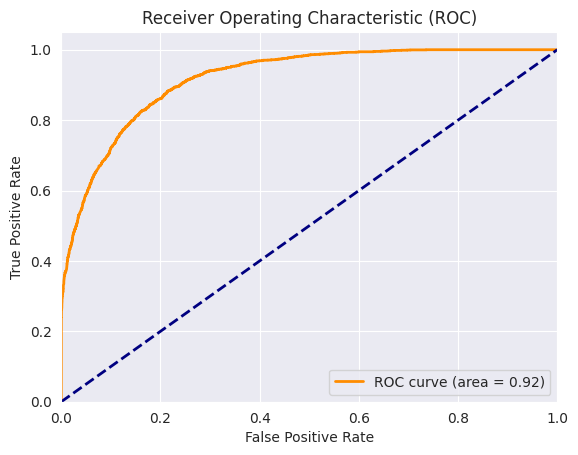

In [15]:
y_probs = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [11]:
with mlflow.start_run(run_name=f'{counter}_experiment'): # Add MLflow
    st_b = study.best_params
    mlflow.log_params(st_b)
    stud_bv = study.best_value


    pipe.set_params(**st_b)
    pipe.fit(X_train, y_train)
    mlflow.sklearn.log_model(pipe,'best_model')

    pred_test = pipe.predict(X_test)
    f1_test = f1_score(pred_test, y_test, average='macro')


    log_sum = {'f1_macro_cv5': stud_bv,
               'f1_score_macro': f1_test}

    mlflow.log_metrics(log_sum)

2024/07/31 19:27:01 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



MlflowException: Could not find experiment with ID 0

In [12]:
# Проверьте, существует ли эксперимент
experiment_name = "XGBClassifier2"
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    # Создайте эксперимент, если он не существует
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    # Используйте существующий эксперимент
    experiment_id = experiment.experiment_id

with mlflow.start_run(experiment_id=experiment_id, run_name=f'{counter}_experiment'):
    st_b = study.best_params
    mlflow.log_params(st_b)
    stud_bv = study.best_value

    pipe.set_params(**st_b)
    pipe.fit(X_train, y_train)
    mlflow.sklearn.log_model(pipe, 'best_model')

    pred_test = pipe.predict(X_test)
    f1_test = f1_score(pred_test, y_test, average='macro')

    log_sum = {'f1_macro_cv5': stud_bv, 'f1_score_macro': f1_test}
    mlflow.log_metrics(log_sum)


In [13]:
stud_bv

0.7919239675991718

In [14]:
st_b

{'XGBClassifier__n_estimators': 69,
 'XGBClassifier__learning_rate': 0.09637086779971349,
 'XGBClassifier__max_depth': 11,
 'XGBClassifier__gamma': 2}

In [15]:
erorr_xtest= f1_score(pred_test, y_test)
erorr_xtest

0.6950092421441775

In [16]:
import fastapi
fastapi.__version__

'0.104.1'

In [18]:
import mlflow
logged_model = 'runs:/e821e0a20ccc476bbc19f8b7e9be12ea/best_model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

array([1, 0, 1, ..., 0, 0, 0])

In [19]:
dump(pipe, 'bestmodel.joblib')

['bestmodel.joblib']

In [20]:
joblib.load('bestmodel.joblib')

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'workclass', 'fnlwgt',
                                                   'education',
                                                   'educational_num',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week',
                                                   'native_count...
                               feature_types=None, gamma=2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.09637086779971349, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=11,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=69,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [21]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: best_model
  flavor: mlflow.sklearn
  run_id: e821e0a20ccc476bbc19f8b7e9be12ea

In [22]:
X_test.to_csv('X_test.csv', index=False)

In [23]:
X_test

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
35254,33,5,48520,15,10,2,2,0,4,1,0,0,40,38
40462,45,3,168191,15,10,2,12,0,4,1,15024,0,37,38
4501,53,3,246117,11,9,2,2,0,4,1,0,0,40,25
498,41,3,42563,9,13,2,12,5,4,0,0,0,25,38
14405,17,4,61838,0,6,4,2,3,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,18,3,45316,1,7,4,7,3,4,0,0,0,20,38
30071,40,3,144928,15,10,0,2,1,4,1,0,0,40,38
29141,28,3,215873,0,6,4,6,3,2,1,0,0,45,38
21569,45,6,50567,11,9,2,3,5,4,0,0,0,40,38


In [24]:
with open('X_test.csv','rb') as file:
    files={'file':file}
    response=requests.post(url='http://127.0.0.1:8004/predict', files=files)
response

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8004): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f1f3d8b2950>: Failed to establish a new connection: [Errno 111] Connection refused'))